# Idea: People tend to use bikes more on weekdays than weekends


# original 
##### Null Hypothesis: The proportion of people that bike during the weekends is more or the same to the proportion of people that bike on weekdays
### $h_0$ : $\dfrac{riders_{weekday}}{riders_{total}} \leqslant  \dfrac{riders_{weekend}}{riders_{total}}$

##### Alternative Hypothesis: The propportion of people that bike during the weekends is less than the proportion of people that bike on weekdays 
### $h_1$ : $\dfrac{riders_{weekday}}{riders_{total}} >\dfrac{riders_{weekend}}{riders_{total}}$

## I've modified my hypothesis to incorporate suggestions based from Sarah's comments (sj909)
### Null Hypothesis: The average amount of bike riders during the weekends is more or the same to the average amount of bike riders that bike on weekdays
### $h_0$ : $\mu_{weekday} \leqslant \mu_{weekend}$

### Alternative Hypothesis: The average amount of bike riders during the weekends is less than the average amount of bike riders that bike on weekdays
### $h_1$ : $\mu_{weekday} > \mu_{weekend}$

### I set signifiance level for $\alpha = 0.05$

Now i import package and other important helper functions.<br>
be advised i used the following packages that may not be in your default environment <br>
dateutil<br>
requests<br>
zipfile<br>
io

In [1]:
#/home/pui_user/PUI2018_msm796/HW4_msm796
#declare libraries
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import datetime
from dateutil.relativedelta import relativedelta #DOWNLOAD THIS PACKAGE#
import os
import requests #DOWNLOAD THIS PACKAGE#
import zipfile #DOWNLOAD THIS PACKAGE#
import io #DOWNLOAD THIS PACKAGE#
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import subprocess as sp
import os

#library#
    
#declare parameters
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

#declare helper functions
def download_citibike_data(yearstart,yearend,monthstart,monthend,output_path):
    '''
    change log:
    
    version 1.0 - Downloads citibike datasets zip files and unzips them. does checking if file already
    exists in path. currently has no input error handling logic.
    ---------------------------------------------------------------------------------------------
    Parameters:
    name - type - description
    yearstart - <int> - refers to the year where you want your download to start
    yearend - <int> - refers to the year where you want your download to start
    monthstart - <int> - refers to the month ssociated with yearstart where you want your download to start
    monthend - <int> - refers to the month associated with yearend where you want your download to start
    outputpath - <str> - refers to location where you want to dump the csv files
    
    example usage:
    download_citibike_data(2013,2018,6,8,puidata)
    - this downloads the citibike datasets from June 2013 to August 2018. Files will be unzipped at
    the puidata location.
    
    required libraries:
    datautil - required for year & month generation
    requests - for downloading the zip file
    zipfile - to unzip the file
    io - to read binary data and give it to zipfile; effectly keeping the entire process in memory
    '''
    #might include in error handling in the future for incorrect input
    curr_date = start_date=datetime.datetime(yearstart,monthstart,1).date()
    end_date=datetime.datetime(yearend,monthend,1).date()
    year_month=[start_date.strftime('%Y%m')]
    base_citi_url='https://s3.amazonaws.com/tripdata/'
    while curr_date < end_date:
        curr_date += relativedelta(months=1)
        year_month.append(curr_date.strftime('%Y%m'))
    for x in year_month:
    #need to change logic as csv filename convention isn't done properly#
    #will just base on dates found in directory#
        filename=x+"-citibike-tripdata.csv"
        if os.path.isfile(output_path+"/"+filename)==True:
            print("{} already exists!".format(filename))
        else:
            print("Downloading {}".format(filename))
            year=int(x[:4])
            if year>=2017:
                ending=".csv.zip"
            else:
                ending=".zip"
            url=base_citi_url+x+"-citibike-tripdata"+ending
            r = requests.get(url, stream=True)
            z = zipfile.ZipFile(io.BytesIO(r.content))
            z.extractall(output_path)
            
def append_all_citi_bike_data(input_path):
    '''
    developer's notes:
    please refactor me! thanks!
    change log:
    
    version 1.0 -currently has no input error handling logic or checking if file exists.

    Parameters:
    name - type - description
    
    input_path - <str> - location where the csv files are stored
    -Naively appends all files into one superfile
    
    required libraries:
    pandas - the output will be a dataframe, also used to load the files
    '''
    #currently implementing
    files_directory=os.listdir(input_path)
    csv_files = [x for x in files_directory if (".csv" in x) & (("citi" in x) | ("Citi" in x))]
    super_csv = pd.concat([pd.io.parsers.read_csv(input_path+"/"+f,engine='c',memory_map=True,low_memory='dtype') for f in csv_files],sort=False)
#    super_csv = pd.concat([pd.read_csv(input_path+"/"+f,engine='c',memory_map=True,low_memory='dtype') for f in csv_files])
    return super_csv

# I get all the 2016 data from citibike and then concatenate them into one dataframe

In [2]:
#downloads from beginning to latest available as of late September
download_citibike_data(2016,2016,1,12,puidata)
complete_set=append_all_citi_bike_data(puidata)

MemoryError: 

In [ ]:
#complete_set.to_csv(puidata+'/complete_bike_as_of_201808.csv')
#complete_set.to_csv(puidata+'/complete_2016_bike.csv')
#complete_set2=pd.read_csv(puidata+'/complete_2016_bike.csv',engine='c',memory_map=True,low_memory='dtype')

## Displaying the first five rows of the dataset

In [19]:
complete_set.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,538.0,5/1/2016 00:00:03,5/1/2016 00:09:02,536.0,1 Ave & E 30 St,40.741444,-73.975361,497.0,E 17 St & Broadway,40.737050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,224.0,5/1/2016 00:00:04,5/1/2016 00:03:49,361.0,Allen St & Hester St,40.716059,-73.991908,340.0,Madison St & Clinton St,40.712690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,328.0,5/1/2016 00:00:14,5/1/2016 00:05:43,301.0,E 2 St & Avenue B,40.722174,-73.983688,311.0,Norfolk St & Broome St,40.717227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1196.0,5/1/2016 00:00:20,5/1/2016 00:20:17,3141.0,1 Ave & E 68 St,40.765005,-73.958185,237.0,E 11 St & 2 Ave,40.730473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,753.0,5/1/2016 00:00:26,5/1/2016 00:13:00,492.0,W 33 St & 7 Ave,40.750200,-73.990931,228.0,E 48 St & 3 Ave,40.754601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## I generate the list of columns before i reduced the number of columns of the dataset

In [ ]:
complete_set.columns.get_values()

## Since the phenomenon i want to investigate only requires that information regarding days, i only keep starttime & stoptime

In [ ]:
drop_cols=[x for x in complete_set.columns.get_values() if x not in ['starttime','stoptime']]
complete_set2=complete_set.drop(drop_cols,axis=1)

## Then i display my first 10 rows

In [ ]:
complete_set2.head(10)

## But we're curious whether or not there are more users during weekdays vs weekends, relatively speaking, so let's derive some days from our remaining columns. So first we remove rows with missing entries for our datetime fields because we cannot use them for this investigation

In [ ]:
complete_set3 = complete_set2.dropna()

## Let's now derive our days

In [65]:
complete_set3['day_start'] = complete_set3['starttime'].apply(lambda x : datetime.datetime.strptime(x, "%m/%d/%Y %H:%M:%S")).apply(lambda x: x.strftime('%A'))
complete_set3['day_end'] = complete_set3['stoptime'].apply(lambda x : datetime.datetime.strptime(x, "%m/%d/%Y %H:%M:%S")).apply(lambda x: x.strftime('%A'))
#complete_set3['day_start'] = complete_set3['starttime'].astype('datetime64[ns]').apply(lambda x: x.strftime('%A'))
#complete_set3['day_end'] = complete_set3['stoptime'].astype('datetime64[ns]').apply(lambda x: x.strftime('%A'))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## So now we have our days. But let's check if there are situations when some rides cross over midnight so that we can know if we can be indifferent of the variable of choice to describe our weekdays and weekends.


In [20]:
complete_set3.head(5)

,starttime,stoptime,day_start,day_end,part_of_week
0,5/1/2016 00:00:03,5/1/2016 00:09:02,Sunday,Sunday,Weekend
1,5/1/2016 00:00:04,5/1/2016 00:03:49,Sunday,Sunday,Weekend
2,5/1/2016 00:00:14,5/1/2016 00:05:43,Sunday,Sunday,Weekend
3,5/1/2016 00:00:20,5/1/2016 00:20:17,Sunday,Sunday,Weekend
4,5/1/2016 00:00:26,5/1/2016 00:13:00,Sunday,Sunday,Weekend


In [21]:
complete_set3[complete_set3['day_start']!=complete_set3['day_end']].head(10)

,starttime,stoptime,day_start,day_end,part_of_week
1455,5/1/2016 08:00:47,5/2/2016 10:50:16,Sunday,Monday,Weekend
1843,5/1/2016 09:05:17,5/2/2016 12:15:58,Sunday,Monday,Weekend
1854,5/1/2016 09:07:52,5/2/2016 10:24:27,Sunday,Monday,Weekend
2026,5/1/2016 09:27:58,5/2/2016 18:22:34,Sunday,Monday,Weekend
2336,5/1/2016 10:19:19,5/2/2016 01:45:38,Sunday,Monday,Weekend
3235,5/1/2016 12:19:50,5/2/2016 08:00:07,Sunday,Monday,Weekend
3459,5/1/2016 12:45:57,5/2/2016 23:13:39,Sunday,Monday,Weekend
4449,5/1/2016 14:09:20,5/2/2016 06:57:20,Sunday,Monday,Weekend
4737,5/1/2016 14:27:22,5/2/2016 08:41:27,Sunday,Monday,Weekend
4933,5/1/2016 14:43:50,5/2/2016 15:26:18,Sunday,Monday,Weekend


## It appears we have a set of observations that start and end trip at different days. Since we're looking into how the day falls under a weekend or weekday affects ridership, then we should use the day when the ride begins as our basis.

In [ ]:
weekend=['Saturday','Sunday']
complete_set3['part_of_week']=complete_set3['day_start'].apply(lambda x: 'Weekend' if x in weekend else 'Weekday')

In [60]:
complete_set3.head(5)

,starttime,stoptime,day_start,day_end,part_of_week
0,5/1/2016 00:00:03,5/1/2016 00:09:02,Sunday,Sunday,Weekend
1,5/1/2016 00:00:04,5/1/2016 00:03:49,Sunday,Sunday,Weekend
2,5/1/2016 00:00:14,5/1/2016 00:05:43,Sunday,Sunday,Weekend
3,5/1/2016 00:00:20,5/1/2016 00:20:17,Sunday,Sunday,Weekend
4,5/1/2016 00:00:26,5/1/2016 00:13:00,Sunday,Sunday,Weekend


## Now let's plot our counts per day

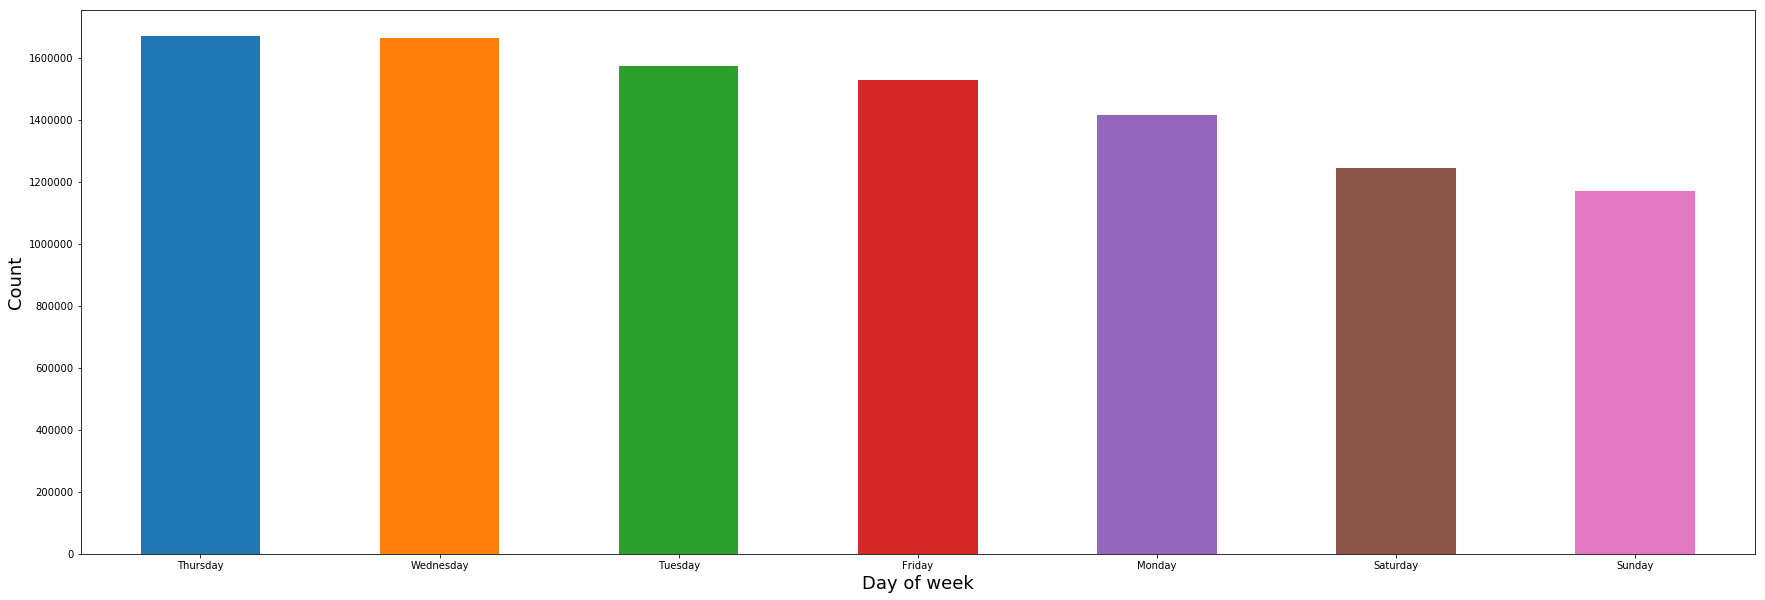

In [22]:
plt.figure(figsize=(30,10))
complete_set3.day_start.value_counts().plot(kind = 'bar',rot=0)
plt.xlabel("Day of week",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.show()

## Based on the bar graph, we get a general sense that weekdays will tend to have more rides than weekends.

# Distribution of weekdays

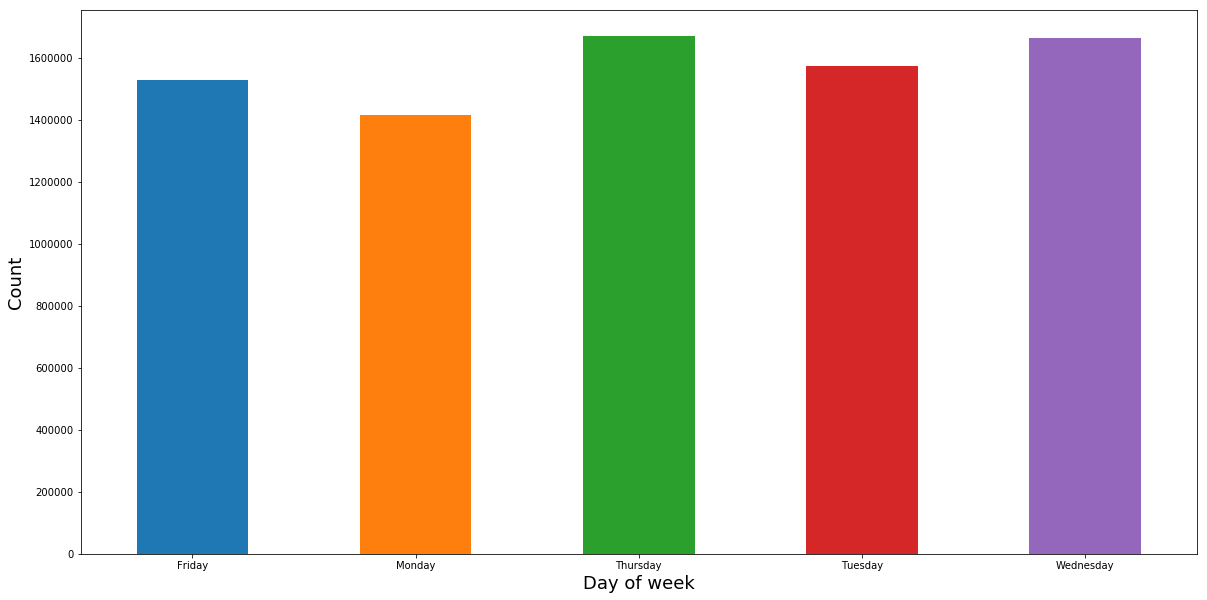

In [23]:
plt.figure(figsize=(20,10))
complete_set3[complete_set3['part_of_week']=='Weekday'].groupby(['day_start'])['part_of_week'].count().plot(kind='bar',rot=0)
plt.xlabel("Day of week",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.show()

### Figure 2: We're dealing with a categorical distribution; a more generalized form of Bernoulli

# Distribution of weekends

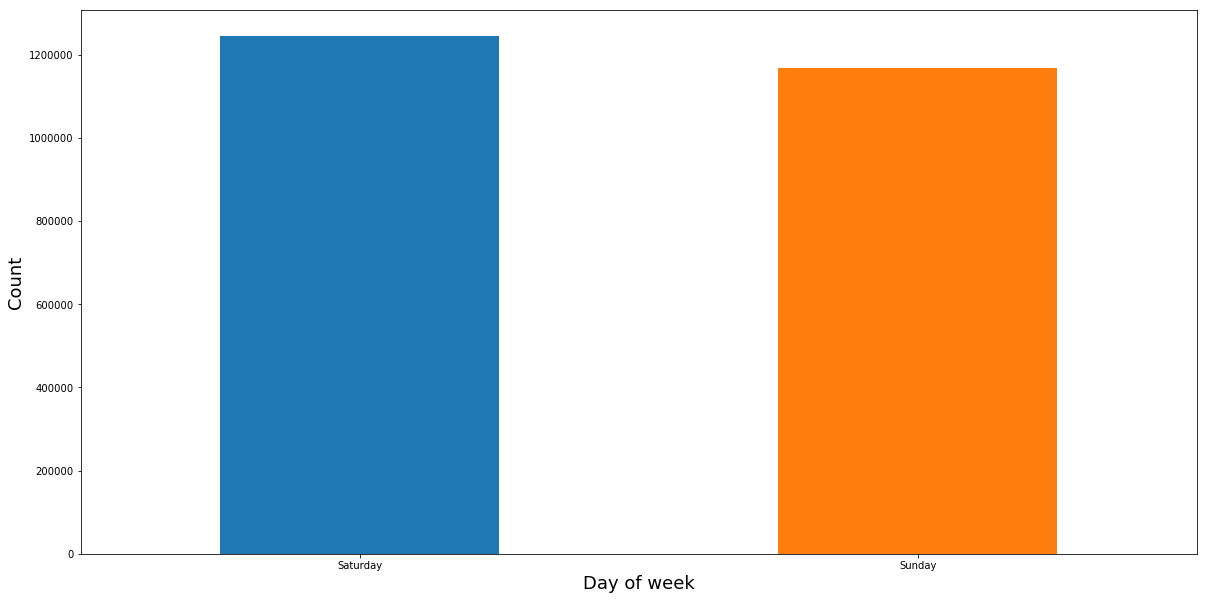

In [24]:
plt.figure(figsize=(20,10))
complete_set3[complete_set3['part_of_week']=='Weekend'].groupby(['day_start'])['part_of_week'].count().plot(kind='bar',rot=0)
plt.xlabel("Day of week",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.show()

### Figure 3: We're dealing with a Bernoulli distribution

# But really, we more interested with the Distribution by part of week

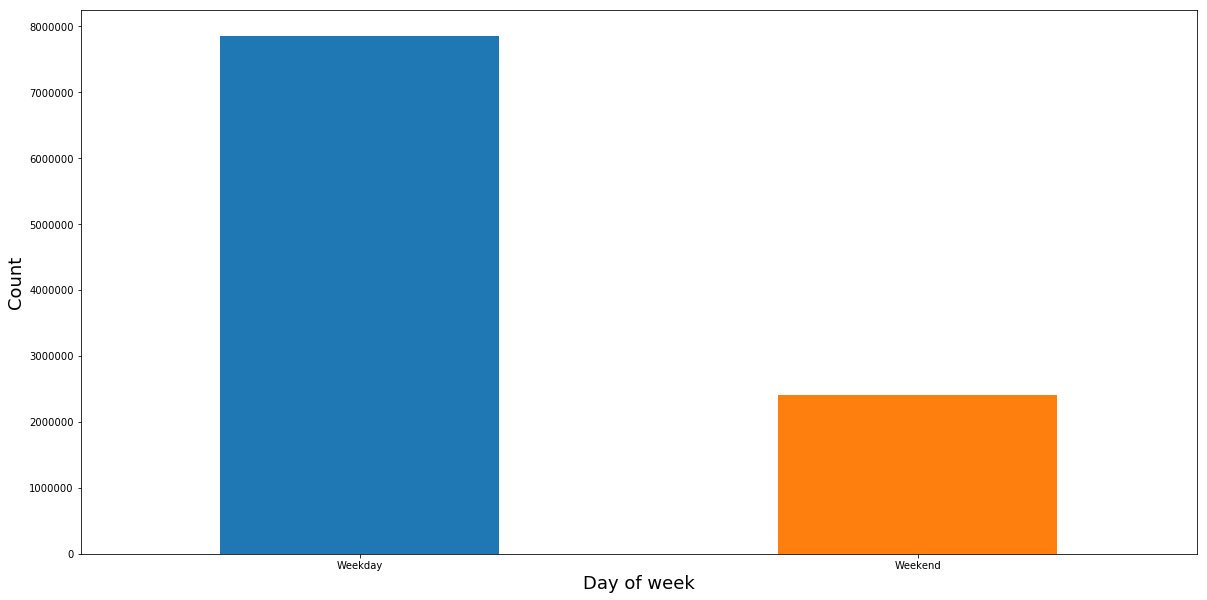

In [25]:
plt.figure(figsize=(20,10))
complete_set3.groupby(['part_of_week'])['day_start'].count().plot(kind='bar',rot=0)
plt.xlabel("Day of week",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.show()

### Figure 3: We're dealing with a Bernoulli distribution
## But naturally, by comparing them with counts is inappropriate. You could come up with a misleading conclusion with the data. There are five days in a weekdays and two days in weekends. So let's get the average ridership during weekdays and weekends, then and also adjust them by normalizing them by their respective Standard Deviation to get a sense on comparing them if they were in the same scale.

In [26]:
mean_wked = complete_set3[complete_set3['part_of_week']=='Weekend'].groupby(['day_start'])['part_of_week'].count().mean()
mean_wkdy = complete_set3[complete_set3['part_of_week']=='Weekday'].groupby(['day_start'])['part_of_week'].count().mean()
std_wked = complete_set3[complete_set3['part_of_week']=='Weekend'].groupby(['day_start'])['part_of_week'].count().std()
std_wkdy = complete_set3[complete_set3['part_of_week']=='Weekday'].groupby(['day_start'])['part_of_week'].count().std()

print("sample mean ridership for weekends: {:,} ,sample mean ridership for weekdays: {:,}".format(mean_wked,mean_wkdy))
print("Standard Error ridership for weekends: {} , Standard Error ridership for weekdays: {}".format(std_wked,std_wkdy))
print("the normalized sample mean ridership for weekends: {} ,the normalized sample mean ridership for weekdays: {}".format(mean_wked/std_wked,mean_wkdy/std_wkdy))

sample mean ridership for weekends: 1,206,589.0 ,sample mean ridership for weekdays: 1,569,894.2
Standard Error ridership for weekends: 53478.485861138586 , Standard Error ridership for weekdays: 104761.91798883791
the normalized sample mean ridership for weekends: 22.56213841081833 ,the normalized sample mean ridership for weekdays: 14.985351835265824


## My reccomender suggested i make use of a non-parametric test but i couldn't get it to work. Since sample size is an issue, i could reintroduce a variable describing the week number of a particular date

In [66]:
complete_set3['week_num'] = complete_set3['starttime'].apply(lambda x : datetime.datetime.strptime(x, "%m/%d/%Y %H:%M:%S")).apply(lambda x: x.strftime('%V'))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
complete_set3.head()

,starttime,stoptime,day_start,day_end,part_of_week,week_num
0,5/1/2016 00:00:03,5/1/2016 00:09:02,Sunday,Sunday,Weekend,17
1,5/1/2016 00:00:04,5/1/2016 00:03:49,Sunday,Sunday,Weekend,17
2,5/1/2016 00:00:14,5/1/2016 00:05:43,Sunday,Sunday,Weekend,17
3,5/1/2016 00:00:20,5/1/2016 00:20:17,Sunday,Sunday,Weekend,17
4,5/1/2016 00:00:26,5/1/2016 00:13:00,Sunday,Sunday,Weekend,17


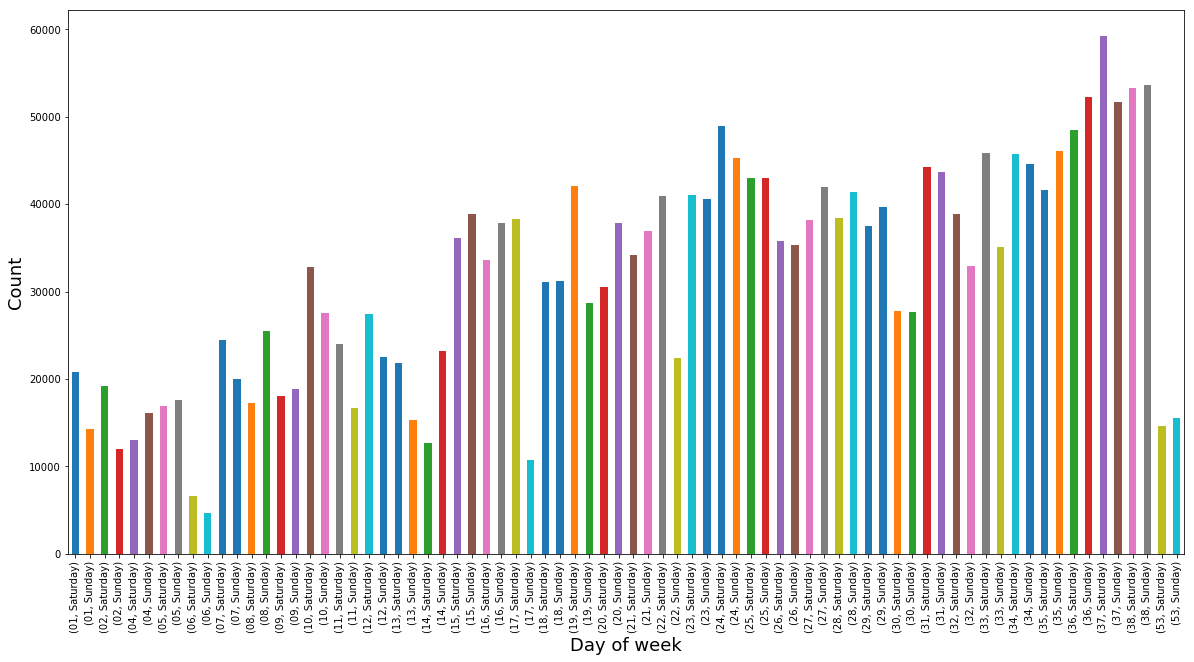

In [69]:
#distribution of weekends
plt.figure(figsize=(20,10))
complete_set3[complete_set3['part_of_week']=='Weekend'].groupby(['week_num','day_start'])['part_of_week'].count().plot(kind='bar',rot=90)
plt.xlabel("Day of week",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.show()

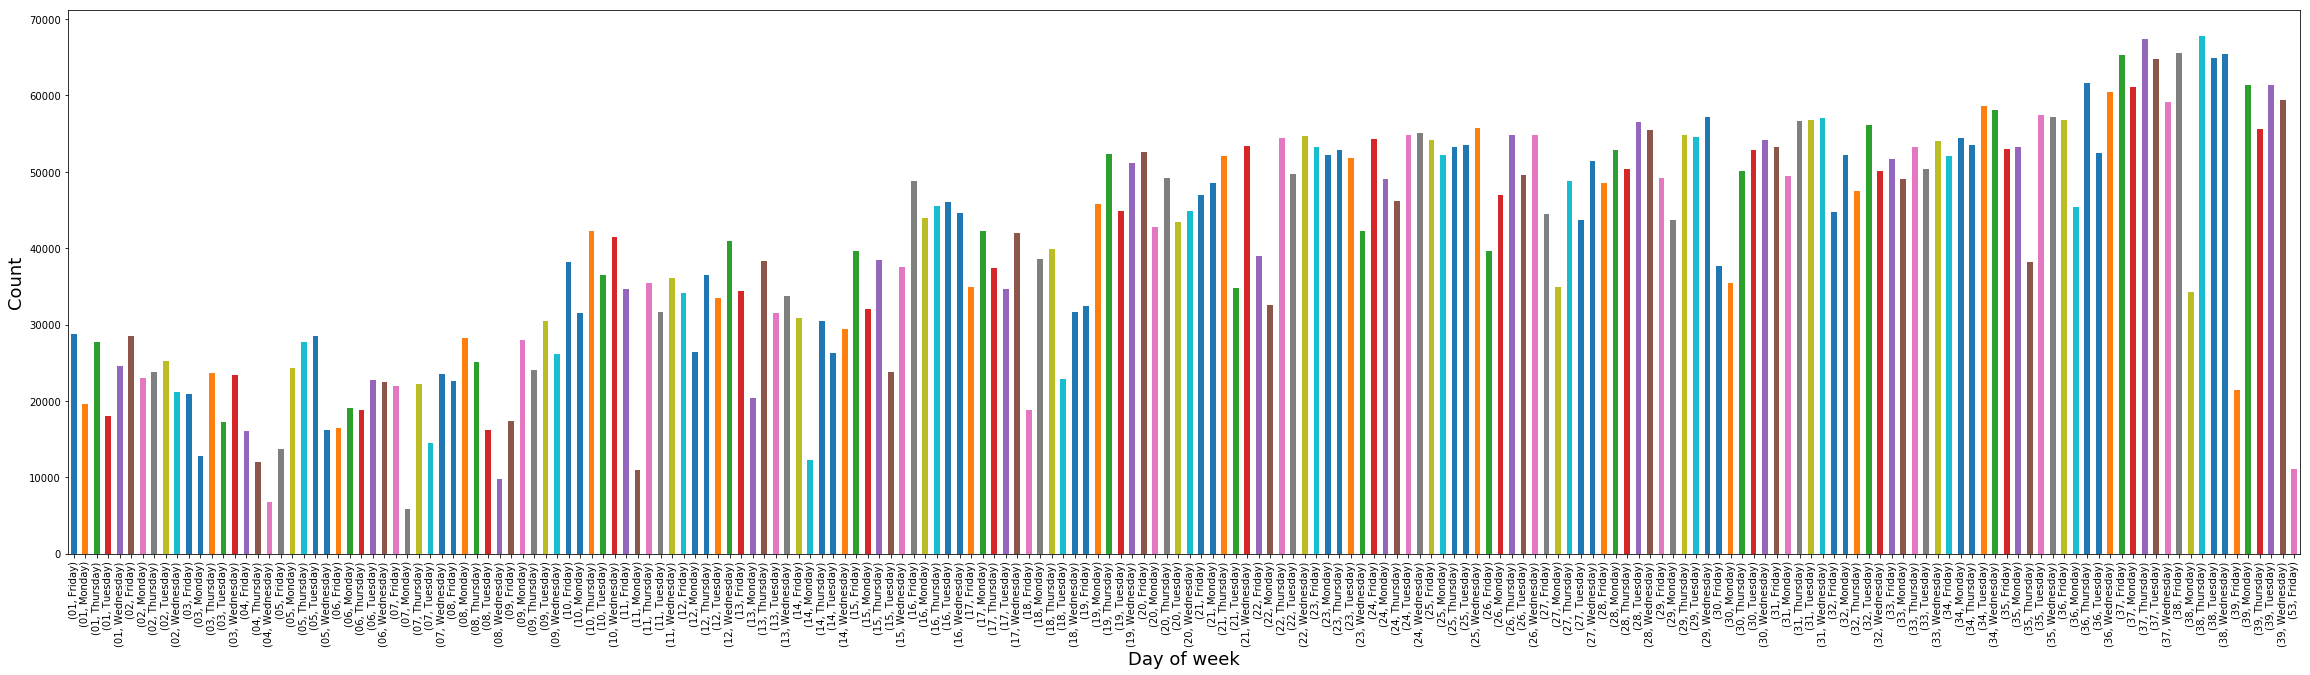

In [100]:
#distribution of weekdays
plt.figure(figsize=(40,10))
complete_set3[complete_set3['part_of_week']=='Weekday'].groupby(['week_num','day_start'])['part_of_week'].count().plot(kind='bar',rot=90)
plt.xlabel("Day of week",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.show()

In [71]:
wkend = complete_set3[complete_set3['part_of_week']=='Weekend'].groupby(['week_num','day_start'])['part_of_week'].count()

In [72]:
wkday = complete_set3[complete_set3['part_of_week']=='Weekday'].groupby(['week_num','day_start'])['part_of_week'].count()

In [75]:
wkend.head()

week_num  day_start
01        Saturday     20846
          Sunday       14275
02        Saturday     19178
          Sunday       12024
04        Saturday     12973
Name: part_of_week, dtype: int64

In [95]:
#Since the statsmodel or scipy doesn't have a paired z-test function, i referred to http://facweb.cs.depaul.edu/sjost/csc423/documents/test-descriptions/paired-z.pdf on formulating the z-test
n = len(wkend)+len(wkday)
d = wkday.mean() - wkend.mean()
sdd = np.sqrt((wkday.mean())**2+(wkend.mean())**2)
SE = sdd/np.sqrt(n)
z = d/SE
print(z)

2.7822976104


In [96]:
p_values = scipy.stats.norm.sf(abs(z))

In [97]:
p_values

0.0026987759394464734

Since my significance threshold is at 0.05 and the resulting p-value is below the threshold, thus we reject the null hypothesis of test.  However this means, since the test is only testing if the differences between the two samples is statistically significant, in terms of the study, this means that, by using the normalized means, there are more on average weekend riders than weekday users.  Which means i can't reject the study's null hypothesis.